In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve

train = pd.read_csv('KDDTrain.csv')
test = pd.read_csv('KDDTest.csv')

In [2]:
print("First few rows of the training data:")
print(train.head())

print("\nFirst few rows of the test data:")
print(test.head())

First few rows of the training data:
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60          

In [3]:
print("\nMissing values in the training data:")
print(train.isnull().sum())

print("\nMissing values in the test data:")
print(test.isnull().sum())


Missing values in the training data:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_hot_login                   0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_

In [4]:
print("\nSummary statistics of numerical features in the training data:")
print(train.describe())

print("\nSummary statistics of numerical features in the test data:")
print(test.describe())


Summary statistics of numerical features in the training data:
           duration     src_bytes     dst_bytes           land  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086   
min         0.00000  0.000000e+00  0.000000e+00       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125973.000000  125973.000000  125973.000000      125973.000000   
mean         0.022687       0.000111       0.204409           0.001222   
std          0.253530       0.014366       2.149968           0.045239   
min          0.000000       0.000000       0.

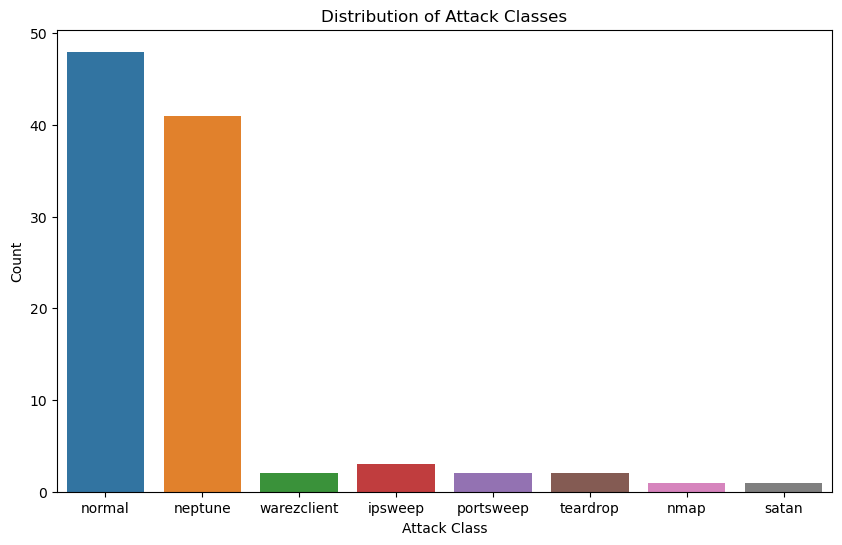

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='attack_class', data=train.head(100))
plt.title('Distribution of Attack Classes')
plt.xlabel('Attack Class')
plt.ylabel('Count')
plt.show()

In [6]:
attack_classes = ['back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'imap', 'ipsweep', 'land', 
                  'loadmodule', 'multihop', 'neptune', 'nmap', 'normal', 'perl', 'phf', 'pod', 'portsweep',
                  'rootkit', 'satan', 'smurf', 'spy', 'teardrop', 'warezclient', 'warezmaster']

train_label = pd.DataFrame()
test_label = pd.DataFrame()

for attack_type in attack_classes:
    train_label[attack_type] = train['attack_class'].apply(lambda x : int(x == attack_type))
    test_label[attack_type] = test['attack_class'].apply(lambda x : int(x == attack_type))
    
train_label[attack_type]

0         0
1         0
2         0
3         0
4         0
         ..
125968    0
125969    0
125970    0
125971    0
125972    0
Name: warezmaster, Length: 125973, dtype: int64

In [7]:
train.drop(['attack_class', 'num_learners'], axis = 1, inplace = True)
test.drop(['attack_class', 'num_learners'], axis = 1, inplace = True)

In [8]:
X_train = train.copy(deep = True)
X_train.drop(['protocol_type', 'service', 'flag'], axis = 1, inplace = True)
print(X_train.info())
y_train = train_label[attack_type]

X_test = test.copy(deep = True)
X_test.drop(['protocol_type', 'service', 'flag'], axis = 1, inplace = True)
y_test = test_label[attack_type]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   src_bytes                    125973 non-null  int64  
 2   dst_bytes                    125973 non-null  int64  
 3   land                         125973 non-null  int64  
 4   wrong_fragment               125973 non-null  int64  
 5   urgent                       125973 non-null  int64  
 6   hot                          125973 non-null  int64  
 7   num_failed_logins            125973 non-null  int64  
 8   logged_in                    125973 non-null  int64  
 9   num_compromised              125973 non-null  int64  
 10  root_shell                   125973 non-null  int64  
 11  su_attempted                 125973 non-null  int64  
 12  num_root                     125973 non-null  int64  
 13 

In [9]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


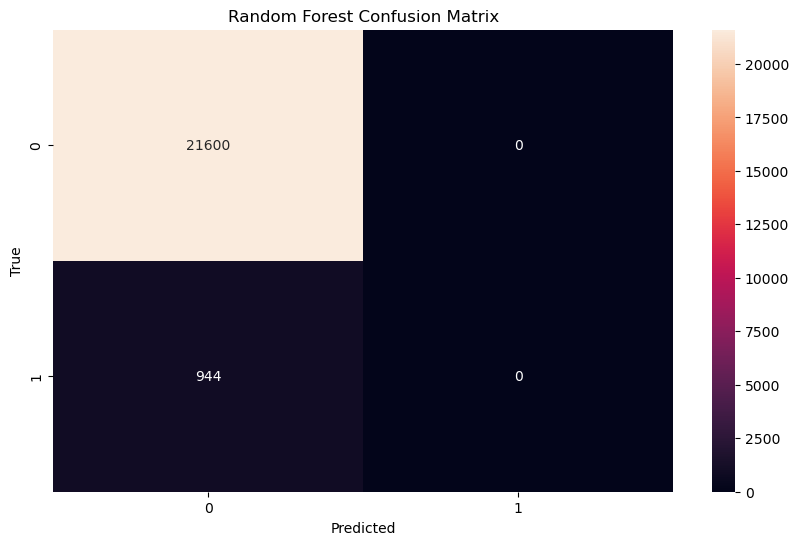

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [11]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


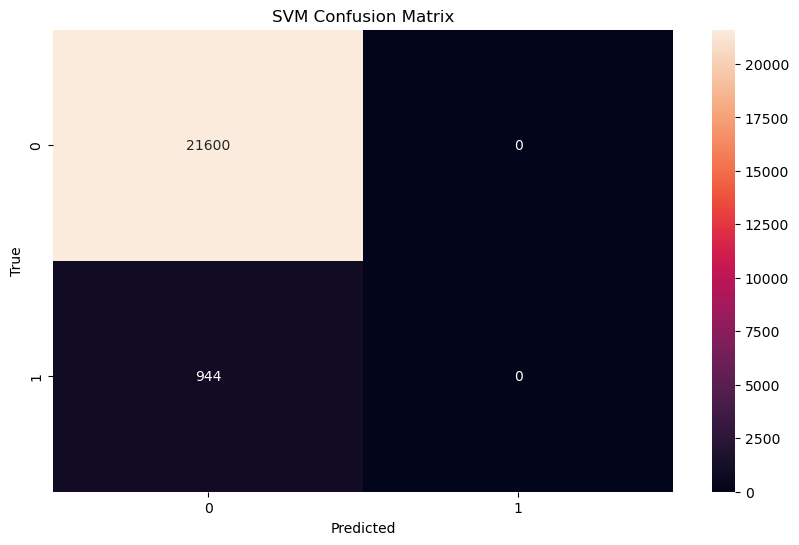

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='d')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

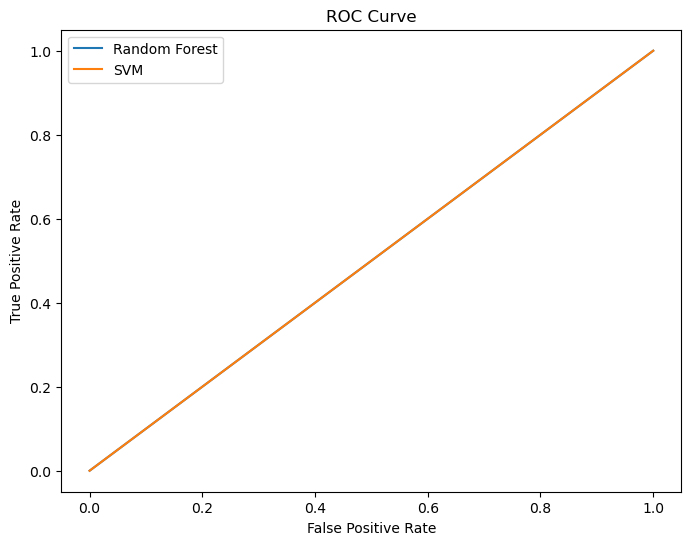

In [13]:
plt.figure(figsize=(8, 6))
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predictions)
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_predictions)
plt.plot(svm_fpr, svm_tpr, label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()